In [ ]:
from fooof import FOOOF
from fooof.sim import gen_power_spectrum
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\eshaa\AppData\Local\Temp\ipykernel_70800\746509959.py:3: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof import FOOOF


In [ ]:
n_samples = 50 
freq_range = [1, 40]
output_data = []

for i in range(n_samples):
    true_offset = np.random.uniform(0.5, 1.5)
    true_exponent = np.random.uniform(1.0, 1.6)
    true_peak_freq = np.random.uniform(8, 12)  
    true_peak_power = np.random.uniform(0.4, 1.0)
    true_peak_bw = np.random.uniform(0.8, 1.2)

    
    freqs, powers = gen_power_spectrum(
        freq_range,
        [true_offset, true_exponent],
        [[true_peak_freq, true_peak_power, true_peak_bw]]
    )

    
    noise = np.random.normal(0, 0.02, size=powers.shape)
    noisy_powers = powers + noise
    noisy_powers = np.clip(noisy_powers, 1e-6, None)  


    fm = FOOOF()
    fm.fit(freqs, noisy_powers)

    
    fit_offset, fit_exponent = fm.aperiodic_params_
    if len(fm.peak_params_) > 0:
        fit_peak_freq, fit_peak_power, fit_peak_bw = fm.peak_params_[0]
    else:
        fit_peak_freq, fit_peak_power, fit_peak_bw = [np.nan] * 3

    
    output_data.append({
        'True_Offset': true_offset,
        'True_Exponent': true_exponent,
        'True_Peak_Freq': true_peak_freq,
        'True_Peak_Power': true_peak_power,
        'Fit_Offset': fit_offset,
        'Fit_Exponent': fit_exponent,
        'Fit_Peak_Freq': fit_peak_freq,
        'Fit_Peak_Power': fit_peak_power,
        'Noise_SD': 0.02
    })

df = pd.DataFrame(output_data)
df.to_csv("synthetic_fooof_dataset.csv", index=False)
df.head()



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a low

,True_Offset,True_Exponent,True_Peak_Freq,True_Peak_Power,Fit_Offset,Fit_Exponent,Fit_Peak_Freq,Fit_Peak_Power,Noise_SD
0,0.827052,1.156497,11.890427,0.883562,0.847183,1.182966,11.880808,0.879722,0.02
1,0.919696,1.416690,8.175944,0.627706,0.952756,1.468385,8.234541,0.650646,0.02
2,0.750211,1.530302,10.053239,0.934314,1.710285,2.776517,29.404069,1.229549,0.02
3,1.207701,1.225907,11.103577,0.619177,1.219518,1.242130,11.103926,0.620814,0.02
4,1.323767,1.411919,8.329628,0.755897,1.347108,1.446493,8.340859,0.756428,0.02


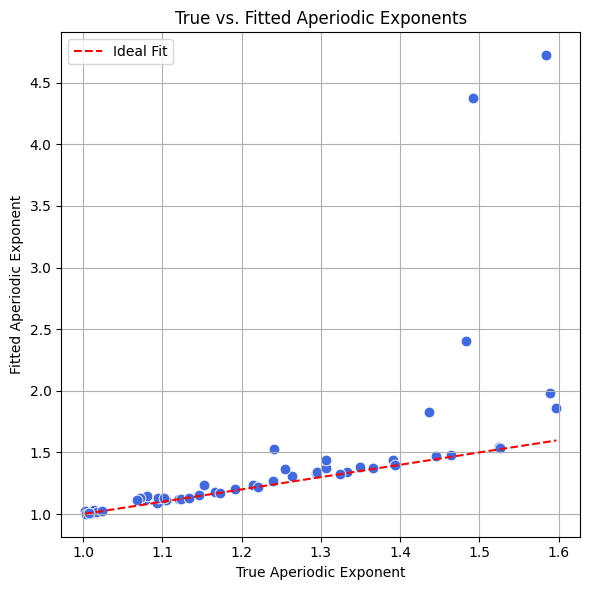

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='True_Exponent', y='Fit_Exponent', color='royalblue', s=60)
plt.plot([df['True_Exponent'].min(), df['True_Exponent'].max()],
         [df['True_Exponent'].min(), df['True_Exponent'].max()],
         'r--', label='Ideal Fit')

plt.xlabel("True Aperiodic Exponent")
plt.ylabel("Fitted Aperiodic Exponent")
plt.title("True vs. Fitted Aperiodic Exponents")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


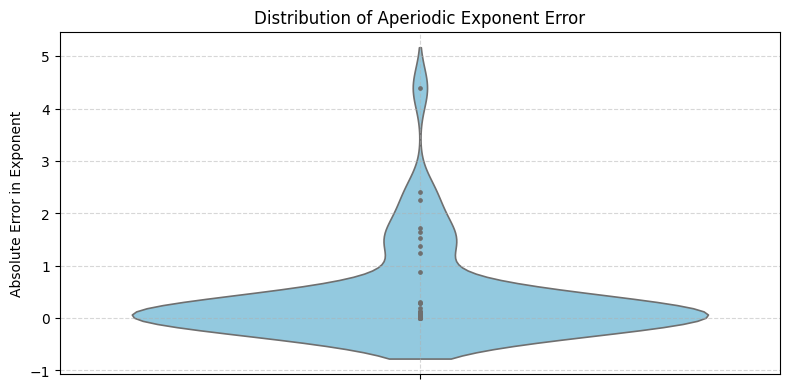

In [ ]:
df['Exponent_Error'] = np.abs(df['True_Exponent'] - df['Fit_Exponent'])


plt.figure(figsize=(8, 4))
sns.violinplot(data=df, y='Exponent_Error', color='skyblue', inner='point', linewidth=1.2)
plt.title("Distribution of Aperiodic Exponent Error")
plt.ylabel("Absolute Error in Exponent")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


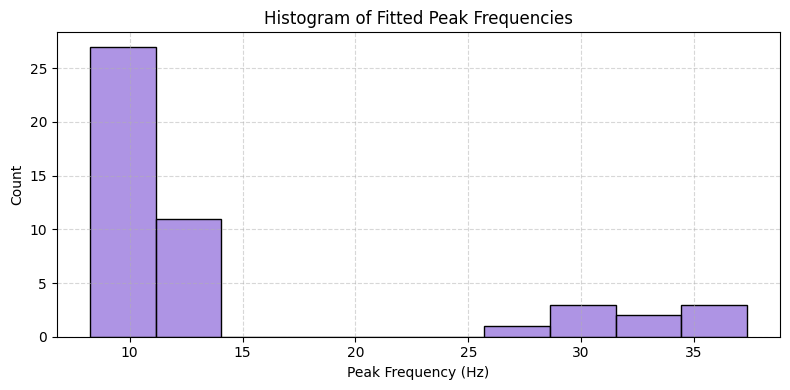

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Fit_Peak_Freq'].dropna(), bins=10, color='mediumpurple')
plt.title("Histogram of Fitted Peak Frequencies")
plt.xlabel("Peak Frequency (Hz)")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


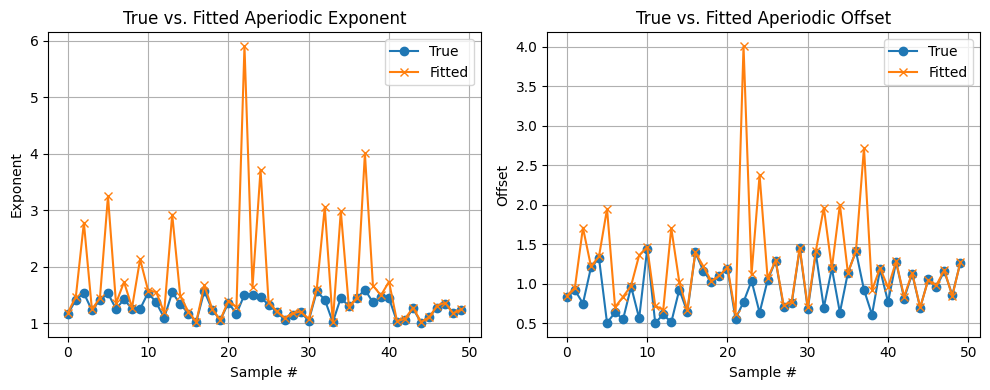

In [ ]:
plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
plt.plot(df['True_Exponent'], label='True', marker='o')
plt.plot(df['Fit_Exponent'], label='Fitted', marker='x')
plt.title("True vs. Fitted Aperiodic Exponent")
plt.xlabel("Sample #")
plt.ylabel("Exponent")
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(df['True_Offset'], label='True', marker='o')
plt.plot(df['Fit_Offset'], label='Fitted', marker='x')
plt.title("True vs. Fitted Aperiodic Offset")
plt.xlabel("Sample #")
plt.ylabel("Offset")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
df['Offset_Error'] = np.abs(df['True_Offset'] - df['Fit_Offset'])
df['Peak_Freq_Error'] = np.abs(df['True_Peak_Freq'] - df['Fit_Peak_Freq'])


In [13]:
df.describe()


,True_Offset,True_Exponent,True_Peak_Freq,True_Peak_Power,Fit_Offset,Fit_Exponent,Fit_Peak_Freq,Fit_Peak_Power,Noise_SD,Exponent_Error,Offset_Error,Peak_Freq_Error
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,47.000000,47.000000,50.00,50.000000,50.000000,47.000000
mean,0.937032,1.297182,10.163244,0.671006,1.249187,1.693632,14.443048,1.047077,0.02,0.397657,0.313252,4.270414
std,0.290472,0.174985,1.171042,0.160440,0.594922,0.943347,8.953683,0.836423,0.00,0.845061,0.649844,8.991402
min,0.504755,1.003784,8.175944,0.409075,0.614175,1.015352,8.234541,0.412894,0.02,0.000490,0.000017,0.000025
25%,0.681229,1.163417,9.051070,0.545740,0.864541,1.192111,9.552484,0.601380,0.02,0.014248,0.010993,0.005712
50%,0.925426,1.284606,10.219842,0.702104,1.138114,1.354542,10.676542,0.745223,0.02,0.035721,0.024347,0.012078
75%,1.178417,1.444393,11.086686,0.772750,1.387919,1.655266,11.868735,0.948573,0.02,0.175497,0.162800,0.048314
max,1.448965,1.592653,11.964299,0.984685,4.010345,5.906016,37.350196,3.574395,0.02,4.399697,3.240761,28.962578


In [14]:
fm.save(f'fooof_model_{i}.json', save_results=True)

In [ ]:
df.to_csv("fooof_analysis_complete.csv", index=False)
df = pd.read_csv("fooof_analysis_complete.csv")


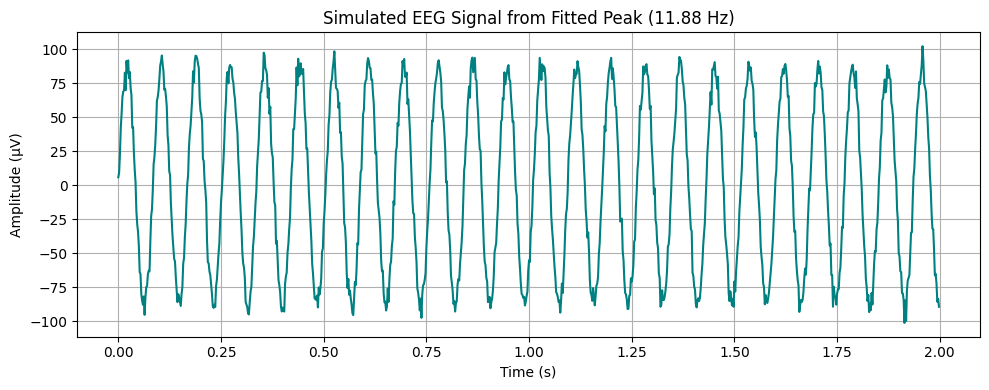

In [ ]:
fs = 500  
duration = 2  
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

sample = df.iloc[0]
f_peak = sample['Fit_Peak_Freq']
amplitude = sample['Fit_Peak_Power'] * 100  
if np.isnan(f_peak):
    print("No peak detected in sample 0")
    eeg_sim = np.random.normal(0, 5, size=len(t))  
else:
    eeg_sim = amplitude * np.sin(2 * np.pi * f_peak * t) + np.random.normal(0, 5, size=len(t))


plt.figure(figsize=(10, 4))
plt.plot(t, eeg_sim, color='teal')
plt.title(f"Simulated EEG Signal from Fitted Peak ({f_peak:.2f} Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.grid(True)
plt.tight_layout()
plt.show()



	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                        The model was run on the frequency range 1 - 40 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          0.9988,

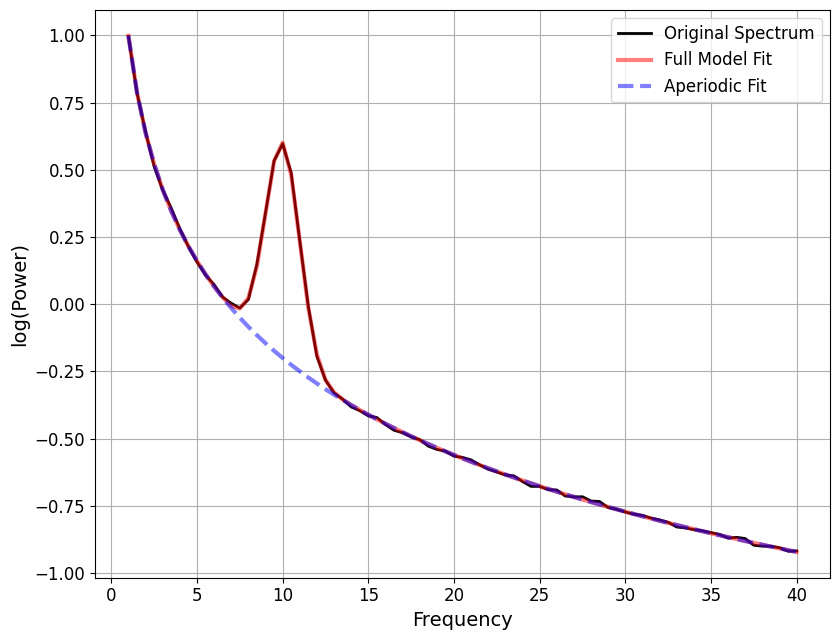

In [ ]:
from specparam import SpectralModel
from specparam.sim import sim_power_spectrum
import matplotlib.pyplot as plt

freqs, powers = sim_power_spectrum(
    [1, 40],                          
    aperiodic_params=[1, 1.2],        
    periodic_params=[[10, 0.8, 1.0]]  
)

sp_model = SpectralModel()
sp_model.fit(freqs, powers)

sp_model.print_results()
sp_model.plot()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



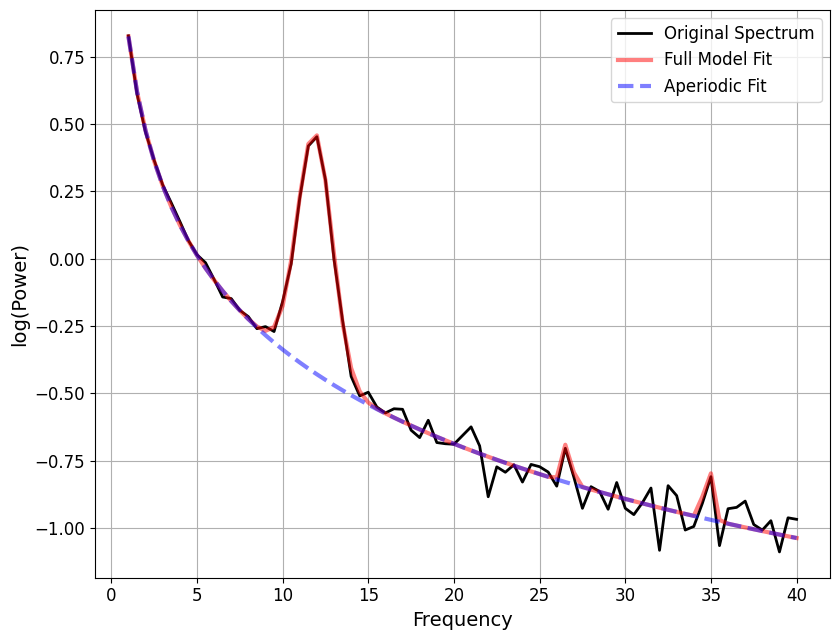

In [25]:
sample_idx = 0  

sample = df.iloc[sample_idx]
true_offset = sample['True_Offset']
true_exponent = sample['True_Exponent']
true_peak_freq = sample['True_Peak_Freq']
true_peak_power = sample['True_Peak_Power']
true_peak_bw = 1.0  

freq_range = [1, 40]
freqs, powers = gen_power_spectrum(
    freq_range,
    [true_offset, true_exponent],
    [[true_peak_freq, true_peak_power, true_peak_bw]]
)

noise = np.random.normal(0, 0.02, size=powers.shape)
noisy_powers = powers + noise
noisy_powers = np.clip(noisy_powers, 1e-6, None)  

fm = FOOOF()
fm.fit(freqs, noisy_powers)

fm.plot()



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



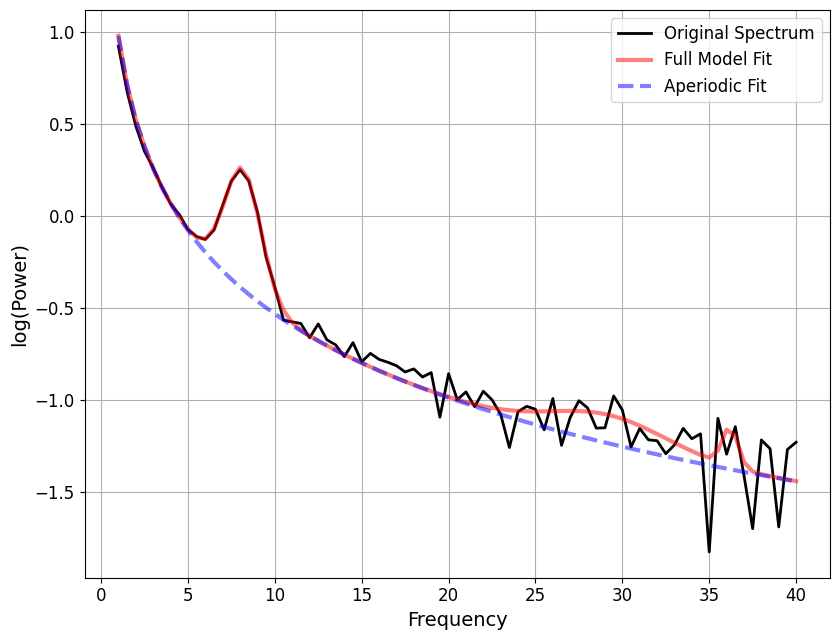

In [ ]:
sample_idx = 1  

sample = df.iloc[sample_idx]
true_offset = sample['True_Offset']
true_exponent = sample['True_Exponent']
true_peak_freq = sample['True_Peak_Freq']
true_peak_power = sample['True_Peak_Power']
true_peak_bw = 1.0  

freq_range = [1, 40]
freqs, powers = gen_power_spectrum(
    freq_range,
    [true_offset, true_exponent],
    [[true_peak_freq, true_peak_power, true_peak_bw]]
)

noise = np.random.normal(0, 0.02, size=powers.shape)
noisy_powers = powers + noise
noisy_powers = np.clip(noisy_powers, 1e-6, None)  

fm = FOOOF()
fm.fit(freqs, noisy_powers)

fm.plot()



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



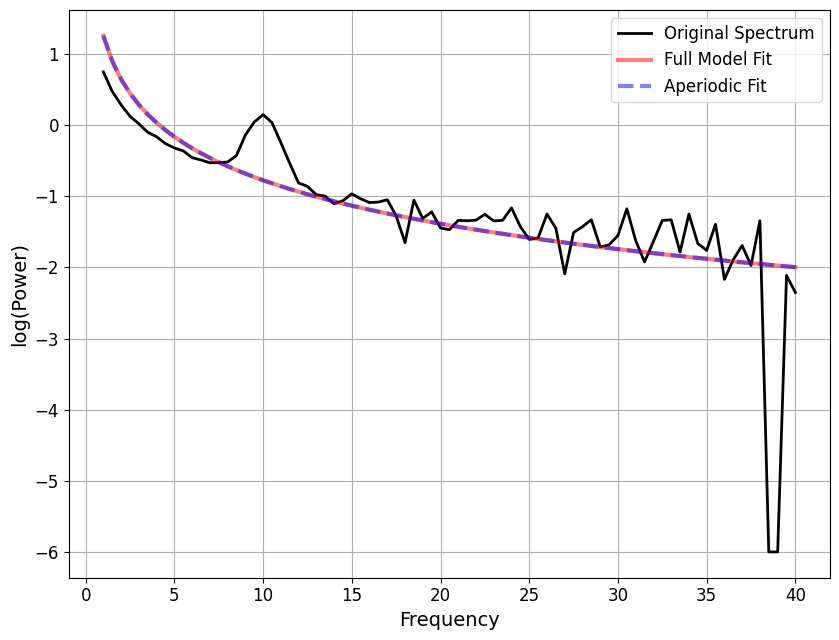

In [26]:
sample_idx = 2  

sample = df.iloc[sample_idx]
true_offset = sample['True_Offset']
true_exponent = sample['True_Exponent']
true_peak_freq = sample['True_Peak_Freq']
true_peak_power = sample['True_Peak_Power']
true_peak_bw = 1.0  
freq_range = [1, 40]
freqs, powers = gen_power_spectrum(
    freq_range,
    [true_offset, true_exponent],
    [[true_peak_freq, true_peak_power, true_peak_bw]]
)

noise = np.random.normal(0, 0.02, size=powers.shape)
noisy_powers = powers + noise
noisy_powers = np.clip(noisy_powers, 1e-6, None)  

fm = FOOOF()
fm.fit(freqs, noisy_powers)

fm.plot()
